In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from mlxtend.plotting import plot_decision_regions

In [174]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/LogisticRegression/Two Class/MultipleInput/LogisticeRegressionMultiple.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [175]:
data = data.drop([ 'Unnamed: 0'], axis=1)


In [176]:
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [177]:
data.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [178]:
data['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

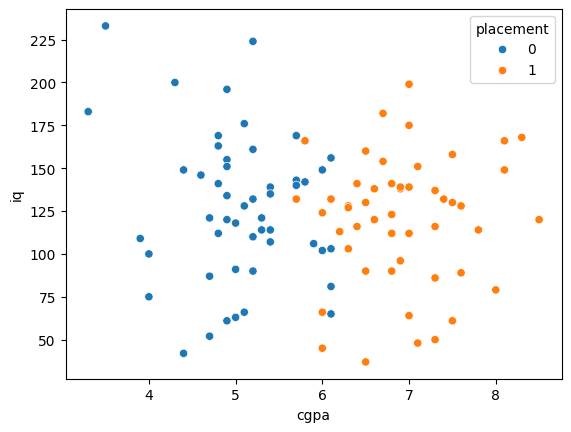

In [179]:
sns.scatterplot(x='cgpa',y='iq',data=data,hue='placement')
plt.show()

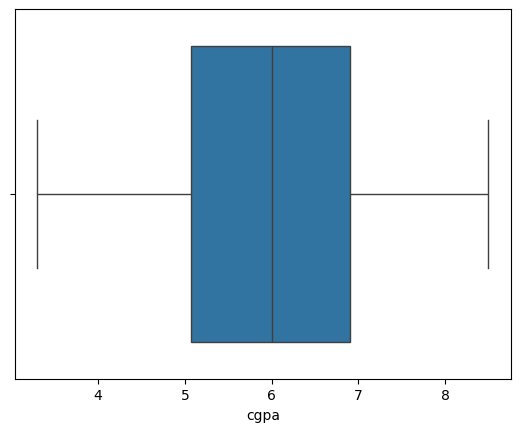

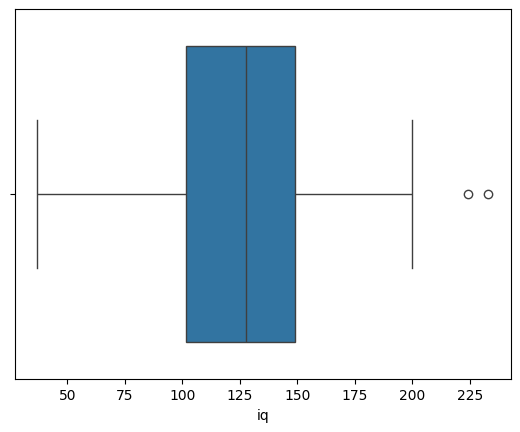

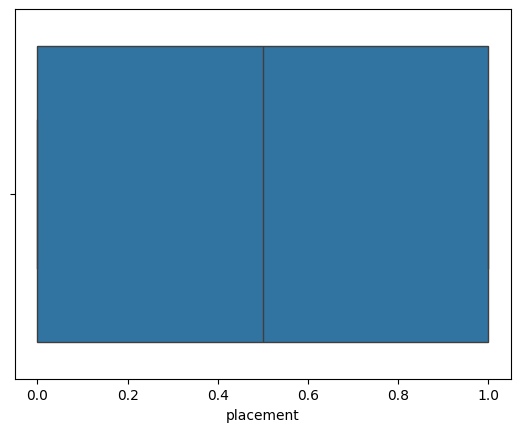

In [180]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

In [181]:
x=data.iloc[:,:-1]
y=data['placement']


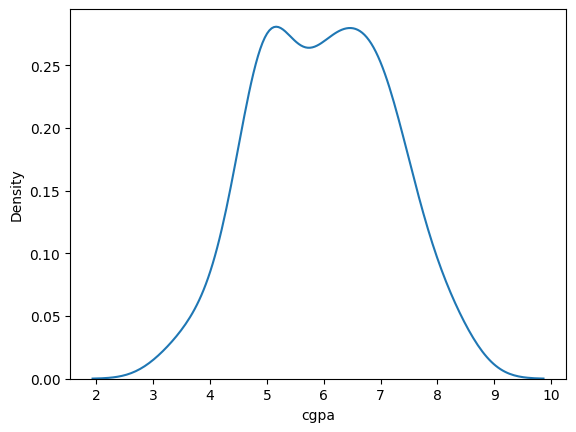

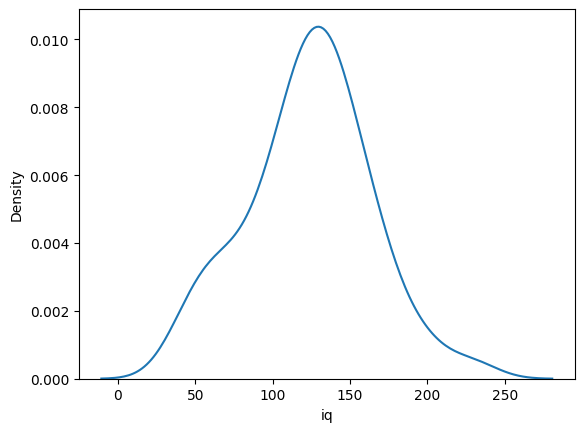

In [182]:
for i in x:
    sns.kdeplot(x=i,data=data)
    plt.show()

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# GaussianNB

In [183]:

# Step 1: Find best random_state
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"✅ Best Accuracy: {best_score:.4f} at random_state = {best_state}")


✅ Best Accuracy: 1.0000 at random_state = 9


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [185]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [186]:
gnb.score(x_test,y_test)*100

100.0

In [187]:
gnb.predict([[5.9,106]])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


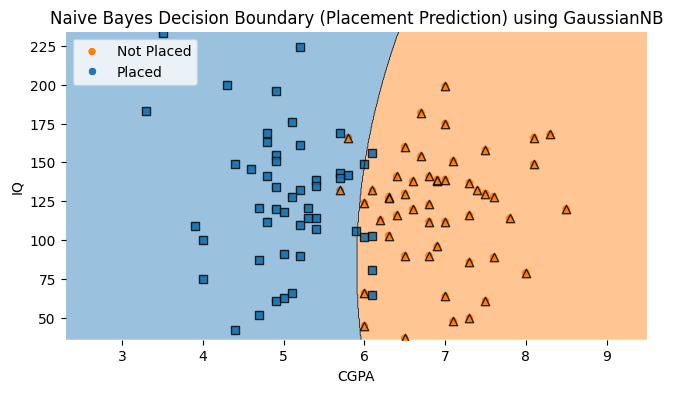

In [188]:
# Plot scatter
plt.figure(figsize=(7.5, 4))
sns.scatterplot(x='cgpa', y='iq', data=data, hue='placement')

# Plot decision regions
plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=gnb)

# Labels and Title
plt.title("Naive Bayes Decision Boundary (Placement Prediction) using GaussianNB")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend(['Not Placed', 'Placed'], loc='upper left')

# Save the figure
plt.savefig('assets/NaiveBayesGaussianNB.jpg')

# Show plot
plt.show()

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# MultinomialNB

In [189]:

# Step 1: Find best random_state
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"✅ Best Accuracy: {best_score:.4f} at random_state = {best_state}")


✅ Best Accuracy: 0.9500 at random_state = 42


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [191]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [192]:
mnb.score(x_test,y_test)*100

95.0

In [193]:
mnb.predict([[5.9,106]])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


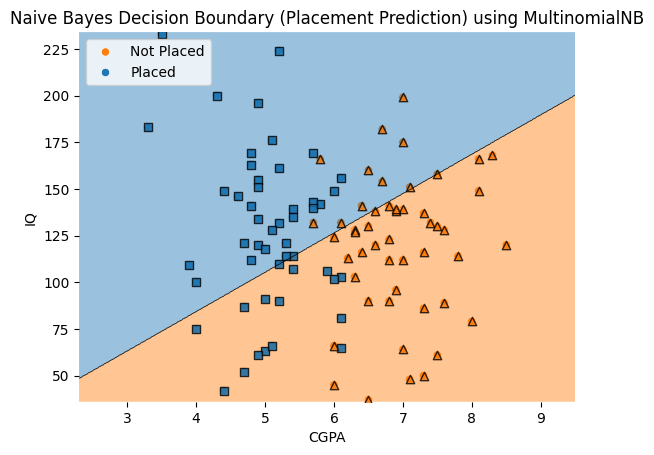

In [194]:
sns.scatterplot(x='cgpa',y='iq',data=data,hue='placement')
plot_decision_regions(X=x.to_numpy(),y=y.to_numpy(),clf=mnb)
plt.title("Naive Bayes Decision Boundary (Placement Prediction) using MultinomialNB")
plt.legend(['Not Placed', 'Placed'], loc='upper left')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.savefig('assets/NaiveBayesMultinomialNB.jpg')
plt.show()

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# BernoulliNB

In [195]:

# Step 1: Find best random_state
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
    model = BernoulliNB()
    model.fit(X_train, y_train)
    
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"✅ Best Accuracy: {best_score:.4f} at random_state = {best_state}")


✅ Best Accuracy: 0.5000 at random_state = 3


In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


In [197]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [198]:
bnb.score(x_test,y_test)

0.5

In [199]:
bnb.predict([[5.9,106]])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


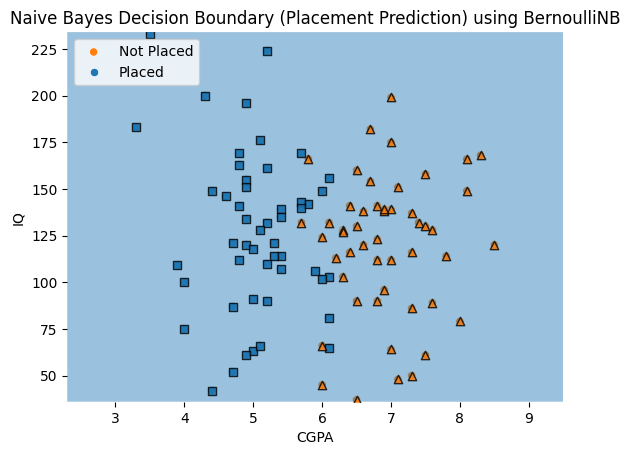

In [200]:
sns.scatterplot(x='cgpa',y='iq',data=data,hue='placement')
plot_decision_regions(X=x.to_numpy(),y=y.to_numpy(),clf=bnb)
plt.title("Naive Bayes Decision Boundary (Placement Prediction) using BernoulliNB")
plt.legend(['Not Placed', 'Placed'], loc='upper left')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.savefig('assets/NaiveBayesBernoulliNB.jpg')
plt.show()